## 🏡 Min-Max Normalization Workshop
### Team Name: Team 8
### Team Members: 
Mandeep Singh Brar 8989367      
HasyaShri Bhatt 9028501     
Babandeep Kaur 9001552      

---

## ❗ Why We Normalize: The Problem with Raw Feature Scales

In housing data, features like `Price` and `Lot_Size` can have values in the hundreds of thousands, while others like `Num_Bedrooms` range from 1 to 5. This creates problems when we use algorithms that depend on numeric magnitudes.

---

### ⚠️ What Goes Wrong Without Normalization

---

### 1. 🧭 K-Nearest Neighbors (KNN)

KNN uses the **Euclidean distance** formula:

$$
d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \cdots}
$$

**Example:**

- $ \text{Price}_1 = 650{,}000, \quad \text{Price}_2 = 250{,}000 $
- $ \text{Bedrooms}_1 = 3, \quad \text{Bedrooms}_2 = 2 $

Now compute squared differences:

$$
(\text{Price}_1 - \text{Price}_2)^2 = (650{,}000 - 250{,}000)^2 = (400{,}000)^2 = 1.6 \times 10^{11}
$$
$$
(\text{Bedrooms}_1 - \text{Bedrooms}_2)^2 = (3 - 2)^2 = 1
$$

➡️ **Price dominates the distance calculation**, making smaller features like `Bedrooms` irrelevant.

---

### 2. 📉 Linear Regression

Linear regression estimates:

$$
y = \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{Bedrooms} + \beta_3 \cdot \text{Lot\_Size} + \epsilon
$$

If `Price` has very large values:
- Gradient updates for $ \beta_1 $ will be **much larger**
- Gradient updates for $ \beta_2 $ (Bedrooms) will be **very small**

➡️ The model overfits high-magnitude features like `Price`.

---

### 3. 🧠 Neural Networks

A single neuron computes:

$$
z = w_1 \cdot \text{Price} + w_2 \cdot \text{Bedrooms} + w_3 \cdot \text{Lot\_Size}
$$

If:

- $ \text{Price} = 650{,}000 $
- $ \text{Bedrooms} = 3 $
- $ \text{Lot\_Size} = 8{,}000 $

Then:

$$
z \approx w_1 \cdot 650{,}000 + w_2 \cdot 3 + w_3 \cdot 8{,}000
$$

➡️ Even with equal weights, `Price` contributes **most of the activation**, making it difficult for the network to learn from other features.

---

### ✅ Solution: Min-Max Normalization

We apply the transformation:

$$
x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

This scales all features to a common range (typically $[0, 1]$).

| Feature      | Raw Value | Min     | Max     | Normalized Value |
|--------------|-----------|---------|---------|------------------|
| Price        | 650,000   | 250,000 | 800,000 | 0.72             |
| Bedrooms     | 3         | 1       | 5       | 0.50             |
| Lot_Size     | 8,000     | 3,000   | 10,000  | 0.714            |

➡️ Now, **each feature contributes fairly** to model training or distance comparisons.

---

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 📌 Use Case: Housing Data
We are normalizing features from a real estate dataset to prepare it for machine learning analysis.

In [2]:
# 🔢 Load and display dataset
housingdata = pd.read_csv('Data/housing_data.csv')
housingdata.head()

,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,574507,1462,3,3,2002,4878
1,H100001,479260,1727,2,2,1979,4943
2,H100002,597153,1403,5,2,1952,5595
3,H100003,728454,1646,5,2,1992,9305
4,H100004,464876,853,1,1,1956,7407


### Dataset Preview:

We inspect the dataset structure using `.info()` to:

- Understand the data types
- Identify the number of entries
- Preview the first few rows of the dataset

In [3]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   House_ID       2000 non-null   object
 1   Price          2000 non-null   int64 
 2   Area_sqft      2000 non-null   int64 
 3   Num_Bedrooms   2000 non-null   int64 
 4   Num_Bathrooms  2000 non-null   int64 
 5   Year_Built     2000 non-null   int64 
 6   Lot_Size       2000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 109.5+ KB


### Check for Missing Values

- Missing values can lead to incorrect analysis or model training.


In [4]:
housingdata.isnull().sum()

House_ID         0
Price            0
Area_sqft        0
Num_Bedrooms     0
Num_Bathrooms    0
Year_Built       0
Lot_Size         0
dtype: int64

We dont have any missing values and we can move forward with the EDA.

## Exploratory Data Analysis (EDA)

We use `.describe()` to get an overview of key metrics such as mean, standard deviation, and percentiles.

In [5]:
housingdata.describe()

,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.068961e+05,1796.453000,2.983500,1.966000,1985.689500,6025.246000
std,1.478786e+05,502.185109,1.409333,0.825945,21.159536,2008.527265
min,1.000000e+05,400.000000,1.000000,1.000000,1950.000000,1000.000000
25%,4.066002e+05,1445.000000,2.000000,1.000000,1967.000000,4664.000000
50%,5.067030e+05,1799.500000,3.000000,2.000000,1986.000000,6010.500000
75%,6.024458e+05,2132.000000,4.000000,3.000000,2003.000000,7414.000000
max,1.077909e+06,3763.000000,5.000000,3.000000,2022.000000,13088.000000


### Univariate Distributions

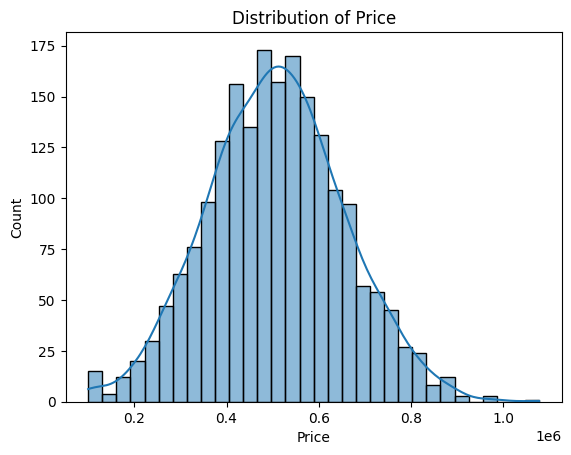

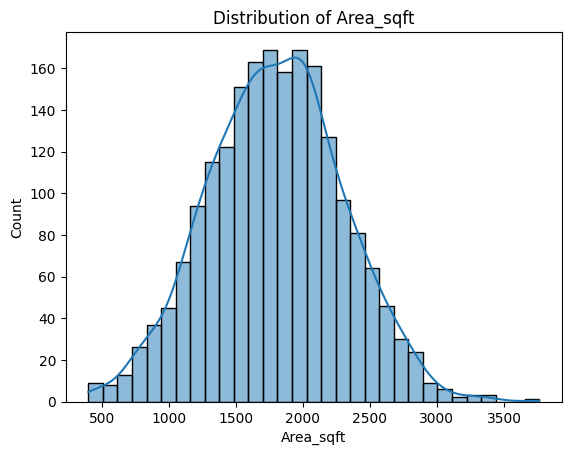

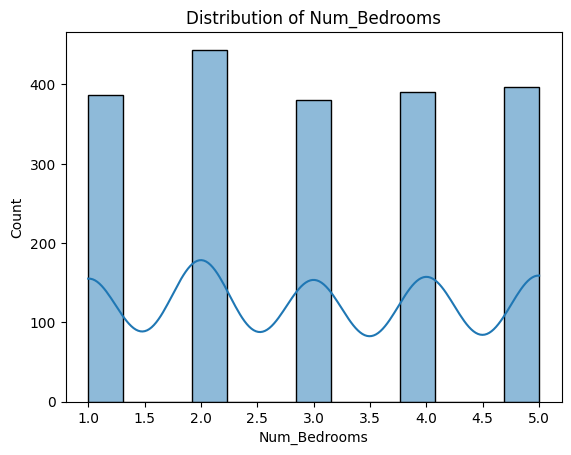

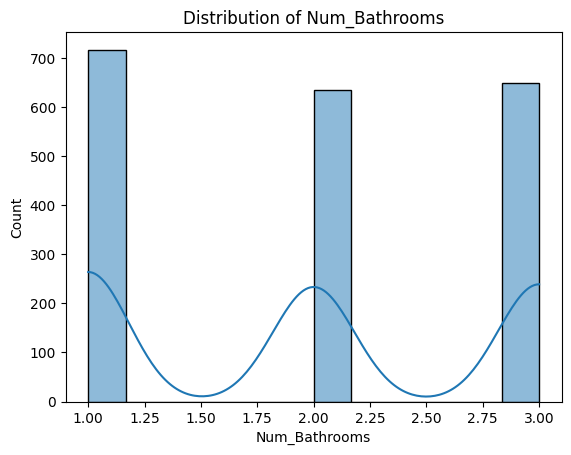

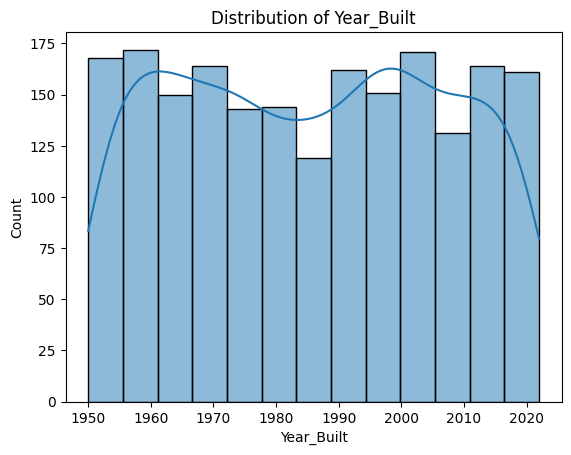

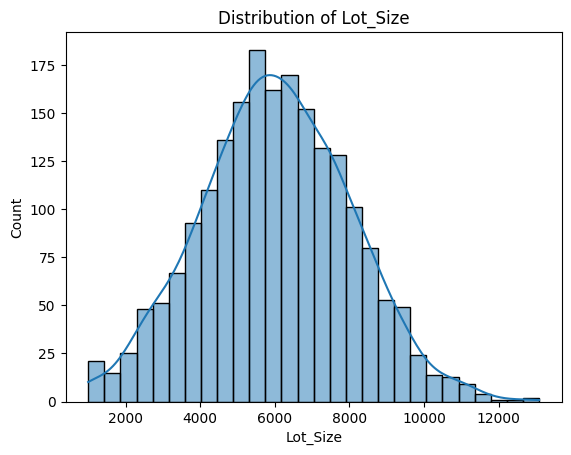

In [6]:
numeric_cols = housingdata.select_dtypes(include='number').columns
for col in numeric_cols:
    sns.histplot(housingdata[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

- Visualizes how each feature is distributed.
- KDE curves help assess normality.

### Correlation Analysis

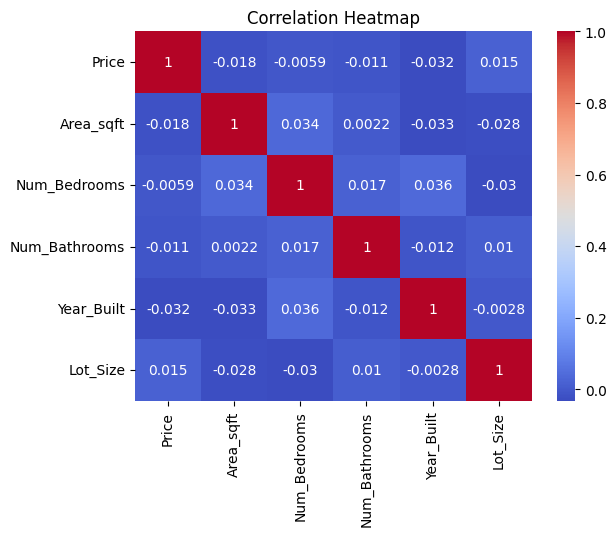

In [7]:
corr = housingdata.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

- Shows how strongly numeric features are related.
- Useful for detecting multicollinearity.

### Box Plot

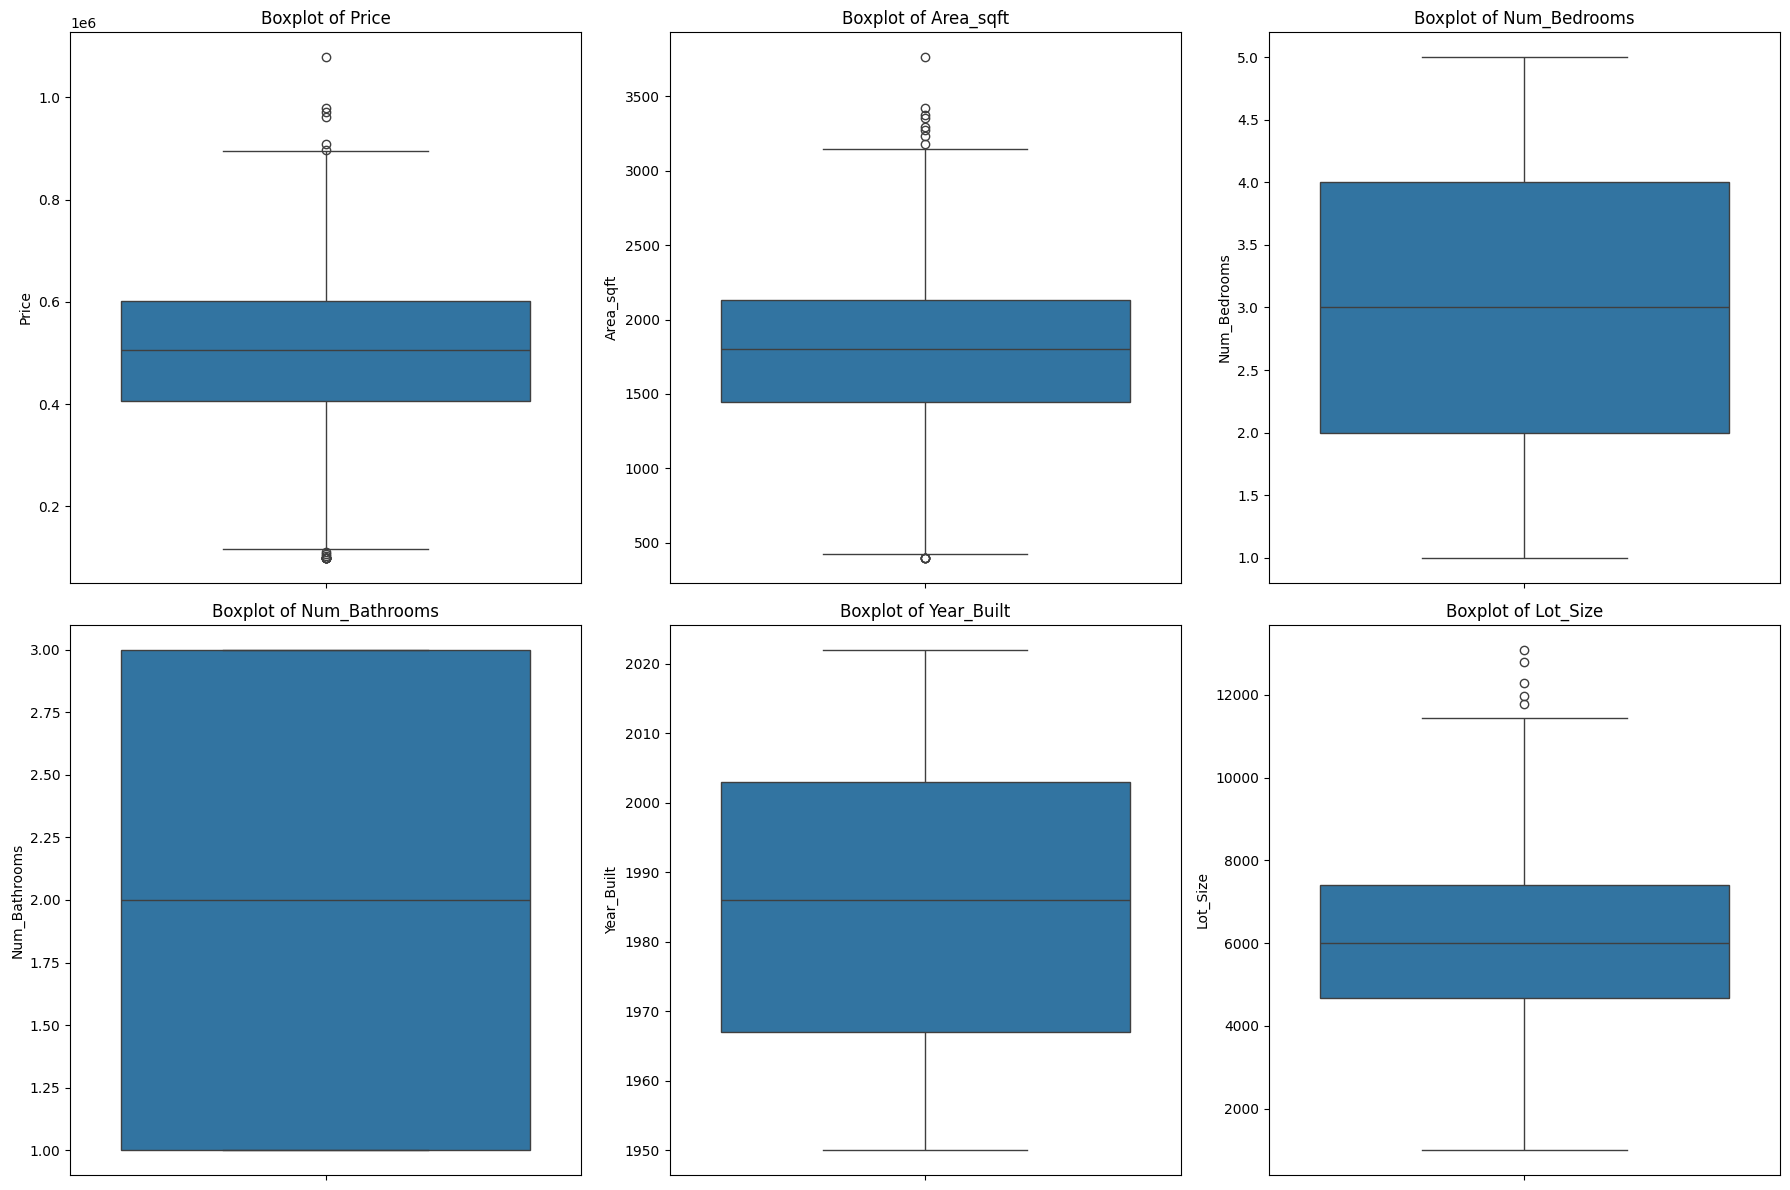

In [8]:
# Get numeric columns only
numeric_cols = housingdata.select_dtypes(include='number').columns
 
# Create boxplots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=housingdata[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#### Boxplots for Outlier Detection
 
Boxplots are used to identify the spread and detect potential outliers in the data for each numerical feature.
 
- Features like `Lot_Size` and `Price` show a wide range and the presence of high-end outliers.
- Discrete features such as `Num_Bedrooms` and `Num_Bathrooms` show clustered values due to limited possible values.
- Outliers can impact the performance of some machine learning algorithms and may need to be treated accordingly.

### Scatter Plots

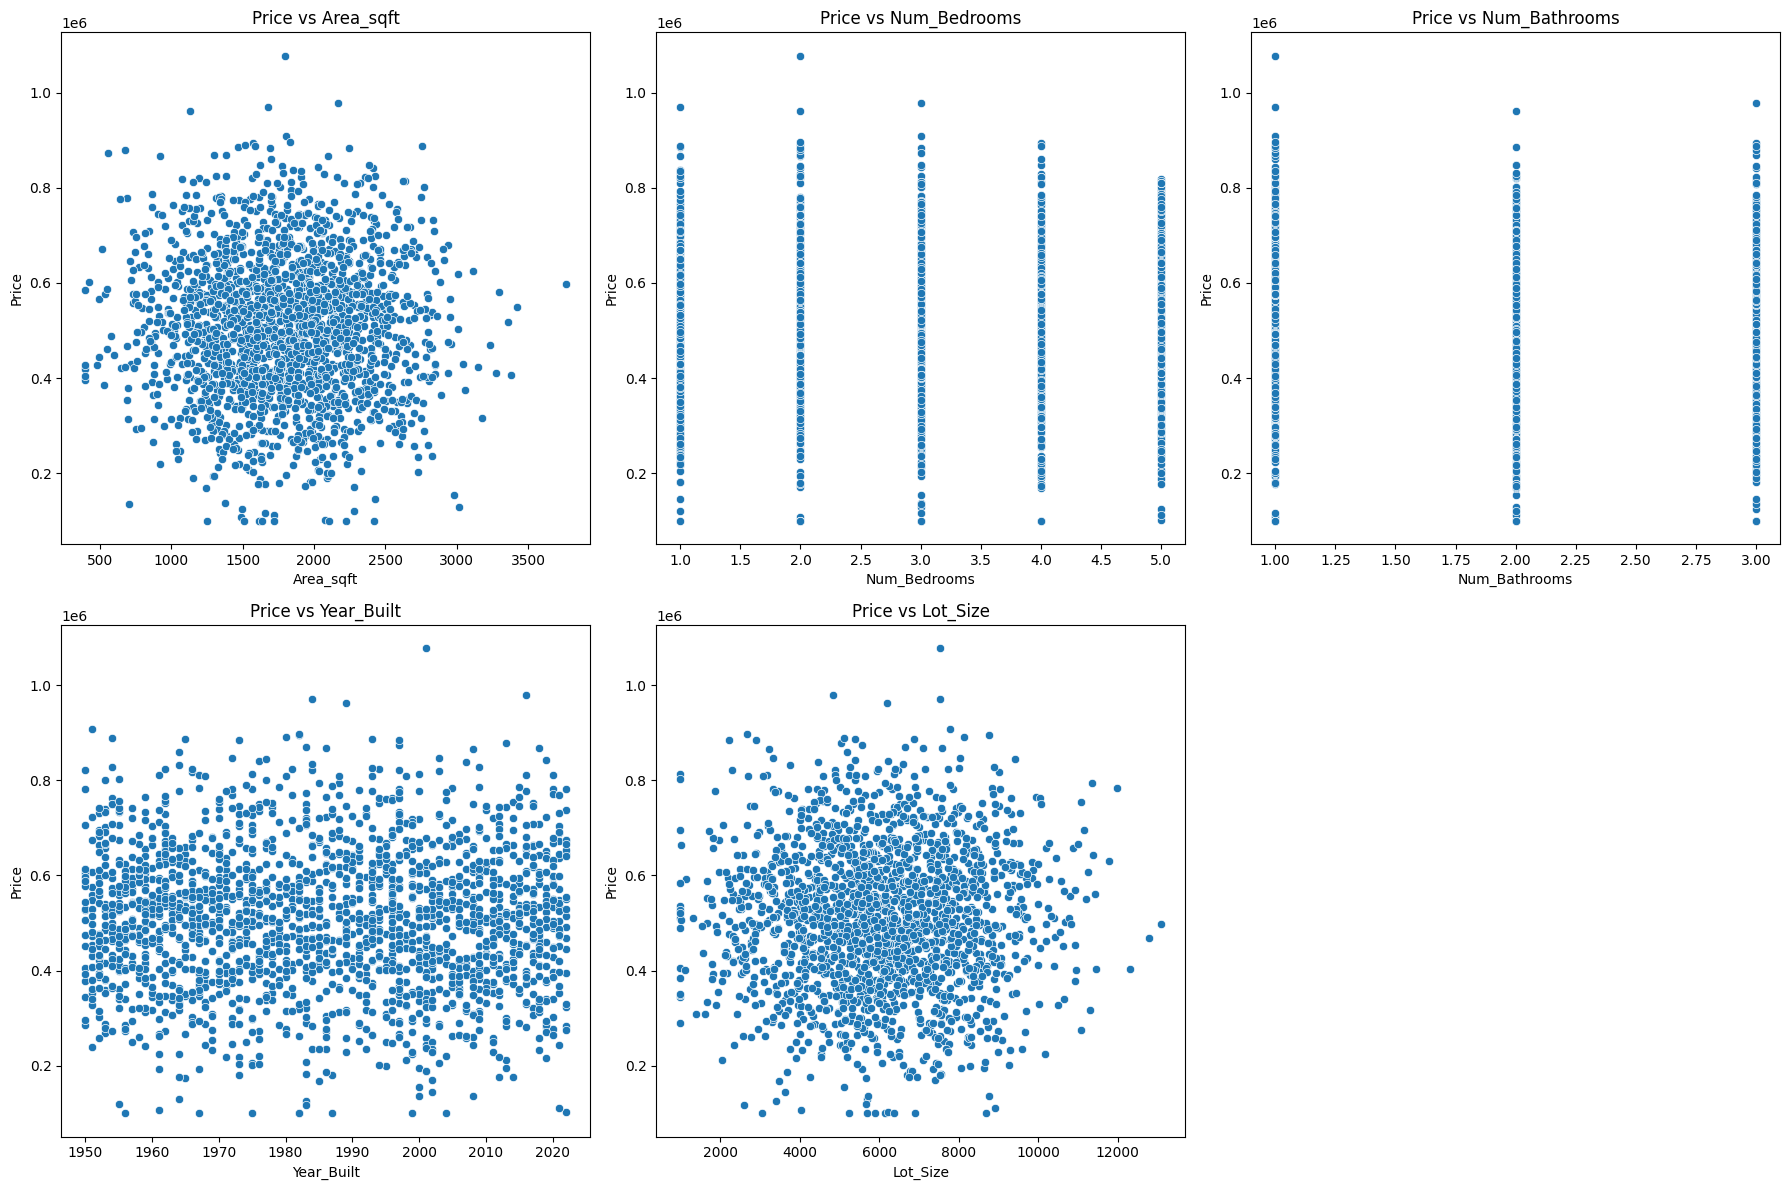

In [9]:
# Create scatter plots of each feature vs Price
plt.figure(figsize=(18, 12))
for i, col in enumerate([c for c in numeric_cols if c != 'Price'], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=housingdata[col], y=housingdata['Price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

#### Scatter Plots: Feature Relationships with Price
 
Scatter plots help visualize the relationship between each input feature and the target variable `Price`.
 
- `Area_sqft` and `Lot_Size` show a positive linear relationship with `Price`, indicating that larger homes tend to be more expensive.
- Categorical-like features (`Num_Bedrooms`, `Num_Bathrooms`) show clustered points, indicating discrete jumps in price with room count.
- These plots help identify which features might be important for predicting housing prices.

### Check for outliers number

In [11]:
# Function to count outliers using the IQR method
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Apply to each relevant numeric column
outlier_counts = {col: count_outliers_iqr(housingdata, col) for col in numeric_cols}

# Convert to DataFrame for display
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier_Count'])
outlier_df


,Feature,Outlier_Count
0,Price,17
1,Area_sqft,13
2,Num_Bedrooms,0
3,Num_Bathrooms,0
4,Year_Built,0
5,Lot_Size,5


### 🔎 Step 1 — Implement Min-Max Normalization on the Housing Dataset

In [10]:
# Reapply manual normalization with rounding to 4 decimal places

# Create a copy
df_manual_norm_rounded = housingdata.copy()

# Columns to normalize
cols_to_normalize = ['Price', 'Area_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Lot_Size']

# Apply normalization and round
for col in cols_to_normalize:
    min_val = housingdata[col].min()
    max_val = housingdata[col].max()
    df_manual_norm_rounded[col] = housingdata[col].apply(lambda x: round((x - min_val) / (max_val - min_val), 4))

# Display the result
df_manual_norm_rounded.head()


,House_ID,Price,Area_sqft,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size
0,H100000,0.4852,0.3158,0.50,1.0,2002,0.3208
1,H100001,0.3878,0.3946,0.25,0.5,1979,0.3262
2,H100002,0.5084,0.2982,1.00,0.5,1952,0.3801
3,H100003,0.6427,0.3705,1.00,0.5,1992,0.6870
4,H100004,0.3731,0.1347,0.00,0.0,1956,0.5300


Instead of using built-in tools like `sklearn` or `numpy`, we applied the formula directly using **basic Python and Pandas**.

We followed these steps:

1. **Created a copy** of the original DataFrame to keep the raw data untouched.
2. **Identified the numeric columns** we wanted to normalize:
   - `Price`
   - `Area_sqft`
   - `Num_Bedrooms`
   - `Num_Bathrooms`
   - `Lot_Size`
3. **Calculated the min and max** for each of these columns.
4. **Applied the normalization formula manually** using `.apply()` with a lambda function.
5. **Rounded all results to 4 decimal places** for better readability.

### ✅ Result

After normalization, each of the selected columns now has values between **0 and 1**, with a consistent scale across the board. This prepares the dataset for effective machine learning modeling and visual analysis.

We deliberately skipped columns like `House_ID` and `Year_Built` here:
- `House_ID` is a unique identifier and doesn’t carry numerical meaning.
- `Year_Built` can be normalized separately if needed, but may require a different treatment based on the context of the analysis.


### 🔎 Talking Point 1 — [Insert your review comment here]

Reviwed by:
- Name
- Name
- Name